### For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
iris_dataset=pd.read_csv('C:/Users/Lenovo/Desktop/Iris.csv')

In [3]:
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
#Pre-Screening unneccesary variables

In [6]:
iris_dataset.drop(['Id'],axis=1,inplace=True)

In [7]:
iris_dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
cont_var=iris_dataset.select_dtypes('float64')
cat_var=iris_dataset.select_dtypes('O')

In [9]:
def cont_var_summary(x):
    n=x.count()
    nmiss=x.isnull().sum()
    avg=x.mean()
    med=x.median()
    variance=x.var()
    stdev=x.std()
    mini=x.min()
    p1=x.quantile(0.01)
    p5=x.quantile(0.05)
    p10=x.quantile(0.10)
    p25=x.quantile(0.25)
    p50=x.quantile(0.50)
    p75=x.quantile(0.75)
    p90=x.quantile(0.90)
    p95=x.quantile(0.95)
    p99=x.quantile(0.99)
    maxi=x.max()
    res=pd.Series([n,nmiss,avg,med,variance,stdev,mini,p1,p5,p10,p25,
                  p50,p75,p90,p95,p99,maxi],index=['N','NMiss','Mean','Median',
                                                  'Variance','StDev','Min','P1',
                                                  'P5','P10','P25','P50','P75',
                                                  'P90','P95','P99','Max'])
    return res

In [10]:
cont_var.apply(cont_var_summary)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
N,150.000000,150.000000,150.000000,150.000000
NMiss,0.000000,0.000000,0.000000,0.000000
Mean,5.843333,3.054000,3.758667,1.198667
Median,5.800000,3.000000,4.350000,1.300000
Variance,0.685694,0.188004,3.113179,0.582414
StDev,0.828066,0.433594,1.764420,0.763161
Min,4.300000,2.000000,1.000000,0.100000
P1,4.400000,2.200000,1.149000,0.100000
P5,4.600000,2.345000,1.300000,0.200000
P10,4.800000,2.500000,1.400000,0.200000


In [11]:
#No Missing Values, therefore, no need for missing value imputation

In [12]:
#No significant difference in different quantiles of values, therefore, 
#assuming no outlier presence 

In [13]:
#No categorical variables in the independent variables, therefore, no need for
#Dummy variables creation

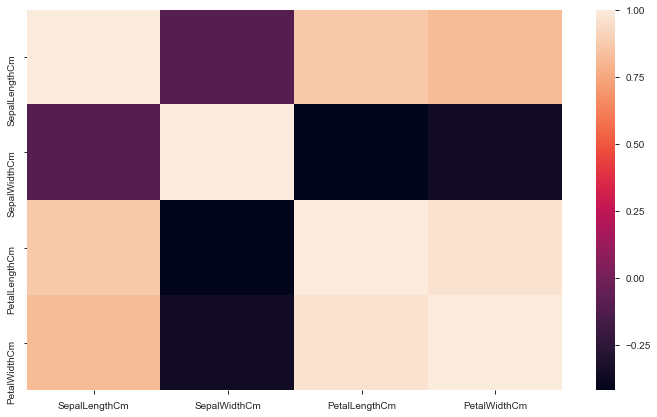

In [14]:
#Checking for correlation among independent variables
plt.figure(figsize=(12,7))
sns.heatmap(cont_var.corr())
plt.show()

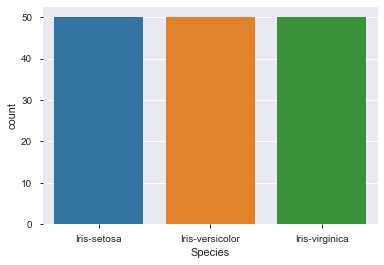

In [15]:
#Checking for balanced/ imbalanced dataset
sns.countplot(iris_dataset.Species)
plt.show()

In [16]:
#Converting the categorical dependent variable to coontinuous variable
iris_dataset.Species.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0,1,2],inplace=True)

In [17]:
#Train Test Split
train,test=train_test_split(iris_dataset,test_size=0.30,random_state=120293)
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

### Decision Tree Classifier

In [18]:
pGrid={'min_samples_split':range(2,10),
      'max_depth':range(2,15)}

In [19]:
gscv_dec=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=pGrid,
                      n_jobs=-1,verbose=10,cv=5)

In [20]:
gscv_dec.fit(train.iloc[:,0:4],train.Species)

Fitting 5 folds for each of 104 candidates, totalling 520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1799s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0646s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1496s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 520 out of 520 | elapsed:    4.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(2, 15),
                         'mi

In [21]:
gscv_dec.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [22]:
dec=DecisionTreeClassifier(max_depth=3,min_samples_split=2)
dec.fit(train.iloc[:,0:4],train.Species)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
list(cat_var.Species.unique())
list(cont_var.columns)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

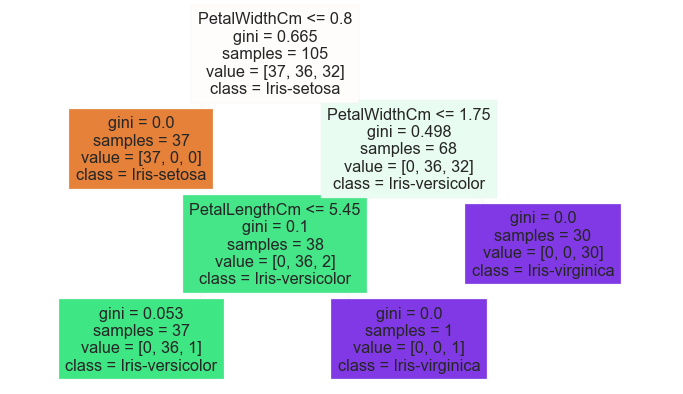

In [24]:
#Visual representation of Decision Tree
plt.figure(figsize=(12,7))
tree.plot_tree(dec,feature_names=list(cont_var.columns),class_names=list(cat_var.Species.unique()),filled=True)
plt.show()

In [25]:
train_pred=pd.Series(dec.predict(train.iloc[:,0:4]))
test_pred=pd.Series(dec.predict(test.iloc[:,0:4]))

In [26]:
train['Pred']=train_pred
test['Pred']=test_pred

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
#Evaluating the model

In [28]:
#Accuracy
train_acc=metrics.accuracy_score(train.Species,train_pred)
test_acc=metrics.accuracy_score(test.Species,test_pred)
print('Accuracy for train dataset:',train_acc)
print('Accuracy for test dataset:',test_acc)

Accuracy for train dataset: 0.9904761904761905
Accuracy for test dataset: 0.9333333333333333


In [29]:
#Confusion Matrix
train_conf=metrics.confusion_matrix(train.Species,train_pred)
test_conf=metrics.confusion_matrix(test.Species,test_pred)
print('Confusion Matrix for train dataset:\n',train_conf)
print('Confusion Matrix for test dataset:\n',test_conf)

Confusion Matrix for train dataset:
 [[37  0  0]
 [ 0 36  0]
 [ 0  1 31]]
Confusion Matrix for test dataset:
 [[13  0  0]
 [ 0 13  1]
 [ 0  2 16]]


In [30]:
#Classification Report
train_class=metrics.classification_report(train.Species,train_pred)
test_class=metrics.classification_report(test.Species,test_pred)
print('Classification Report for train dataset:\n',train_class)
print('Classification Report for test dataset:\n',test_class)

Classification Report for train dataset:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.99        36
           2       1.00      0.97      0.98        32

    accuracy                           0.99       105
   macro avg       0.99      0.99      0.99       105
weighted avg       0.99      0.99      0.99       105

Classification Report for test dataset:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.87      0.93      0.90        14
           2       0.94      0.89      0.91        18

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



### Visualizing the Classification Results

In [31]:
data=pd.concat([train,test],axis=0)
data.reset_index(drop=True,inplace=True)

In [32]:
#Applying PCA so that results can be visualized in a 2-Dimensional plane
from sklearn.decomposition import PCA
pc=PCA(n_components=2).fit(data.iloc[:,0:4])
reduced_comp=pc.fit_transform(data.iloc[:,0:4])
data_reduced_comp=pd.DataFrame(reduced_comp)
data_reduced_comp.columns=['C1','C2']

In [33]:
data_reduced_comp['Species']=data.Species
data_reduced_comp['Pred']=data.Pred

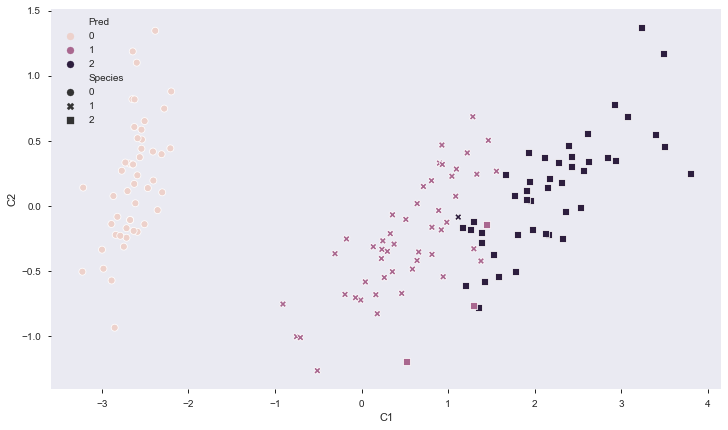

In [34]:
plt.figure(figsize=(12,7))
plt.grid()
sns.scatterplot(data=data_reduced_comp,x='C1',y='C2',style='Species',hue='Pred')
plt.show()